<a href="https://colab.research.google.com/github/noviaputri/MachineLearningTerapan/blob/main/Predictive_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama : Novia Putri**

**Proyek : Prediksi Harga Penjualan Mobil Bekas Merk Audi**

##Data Loading

Agar isi dataset lebih mudah dipahami, maka perlu dilakukan proses loading data terlebih dahulu. Pada proyek ini data diunggah ke dalam file storage di Google Colab. Lalu import library pandas untuk membaca file datanya.

In [ ]:
# upload file dataset ke google colab
from google.colab import files
uploaded = files.upload()

Saving audi.csv to audi.csv


In [ ]:
# library yang digunakan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [ ]:
# menyimpan dataset dalam pandas dataframe
df = pd.read_csv('audi.csv')
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


Output kode di atas memberikan informasi sebagai berikut:
*   Terdapat 10.668 baris (records atau jumlah pengamatan) dalam dataset.
*   Terdapat 9 kolom yaitu model, year, price, transmission, mileage, fuelType, tax, mpg, dan engineSize.

##Deskripsi Variabel

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


Dari output di atas terlihat bahwa:

* Terdapat 3 kolom dengan tipe object, yaitu model, transmission, dan fuelType. Kolom ini merupakan categorical features (fitur non-numerik).
* Terdapat 2 kolom numerik dengan tipe data float64 yaitu mpg dan engineSize. Kolom ini merupakan fitur numerik yang merupakan hasil pengukuran secara fisik.
* Terdapat 4 kolom numerik dengan tipe data int64, yaitu year, price, mileage, dan tax.

In [ ]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


Pada fungsi describe() di atas memberikan informasi statistik pada masing-masing kolom, antara lain:

* Count  adalah jumlah sampel pada data.
* Mean adalah nilai rata-rata.
* Std adalah standar deviasi.
* Min yaitu nilai minimum setiap kolom. 
* 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama. 
* 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
* 75% adalah kuartil ketiga.
* Max adalah nilai maksimum.

##Menangani missing value dan outliers

Pada fungsi describe di atas dapat dilihat bahwa nilai minimal dari kolom tax dan engineSize adalah 0, padahal tidak mungkin bahwa sebuah mobil yang sudah dipakai tidak memiliki pajak dan ukuran mesin. Jadi dapat diduga bahwa ini merupakan data yang tidak valid atau sering disebut missing value. Kode program di bawah ini digunakan untuk melihat jumlah nilai 0 pada kedua kolom tersebut.

In [ ]:
tax = (df.tax == 0).sum()
engineSize = (df.engineSize == 0).sum()
 
print("Nilai 0 di kolom tax ada        : ", tax)
print("Nilai 0 di kolom engine size ada: ", engineSize)

Nilai 0 di kolom tax ada        :  536
Nilai 0 di kolom engine size ada:  57


Kode program dibawah untuk melihat apakah data bernilai 0 pada kolom tax juga terdapat pada kolom engineSize.

In [ ]:
df.loc[(df['tax']==0)]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
30,A1,2015,9500,Automatic,54754,Diesel,0,76.3,1.6
50,A4,2016,12750,Manual,52561,Diesel,0,74.3,2.0
58,A3,2016,10200,Manual,66369,Diesel,0,83.1,1.6
60,A1,2013,7000,Manual,76269,Diesel,0,74.3,1.6
69,A1,2016,10800,Manual,18181,Petrol,0,67.3,1.0
...,...,...,...,...,...,...,...,...,...
10430,A1,2017,13500,Manual,4520,Petrol,0,67.3,1.0
10513,A1,2013,6999,Manual,90000,Diesel,0,74.3,1.6
10591,A1,2016,11000,Manual,42082,Petrol,0,67.3,1.0
10645,A1,2016,10999,Manual,22150,Diesel,0,76.3,1.6


Ternyata jika data memiliki nilai 0 pada kolom tax, belum tentu pula di kolom engineSize akan bernilai 0 pula. Sehingga untuk menangani missing value maka digunakan dua cara yaitu pada kolom tax karena missing valuenya lebih banyak jadi ditangani dengan mengisi missing value dengan nilai mean pada fitur tersebut. Sedangkan pada kolom engineSize karena missing valuenya lebih sedikit maka baris yang terdapat missing value pada fitur tersebut akan di drop.

In [ ]:
# menangani missing value fitur tax
mean_tax = df["tax"].mean()
df["tax"] = df["tax"].replace(0, mean_tax)

# drop baris dengan nilai 'engineSize' = 0
df = df.loc[(df[['engineSize']]!=0).all(axis=1)]
 
# cek ukuran data untuk memastikan baris sudah di-drop
df.shape

(10611, 9)

Setelah missing value diproses dengan mengganti nilai dan menghapus nilai, maka sekarang data tinggal 10611 baris.

Lalu cek data dengan fungsi describe() untuk memastikan tidak ada nilai 0 lagi pada kolom tax dan engineSize.

In [ ]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10611.000000,10611.000000,10611.000000,10611.000000,10611.000000,10611.000000
mean,2017.091415,22855.046273,24913.019037,132.278968,50.801517,1.941080
std,2.162776,11710.119115,23495.654766,60.738323,12.903989,0.587687
min,1997.000000,1490.000000,1.000000,20.000000,18.900000,1.000000
25%,2016.000000,15000.000000,6000.000000,126.011436,40.900000,1.500000
50%,2017.000000,20000.000000,19118.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36547.000000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


Selanjutkan membuat boxplot pada kolom numerik untuk melihat apakah terdapat outlier atau tidak. Outliers adalah sampel yang nilainya sangat jauh dari cakupan umum data utama, sehingga nantinya akan sangat mempengaruhi nilai mean data. 

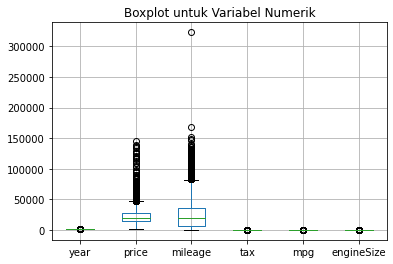

In [ ]:
numeric_cols = df._get_numeric_data().columns
plt.figure()
plt.title("Boxplot untuk Variabel Numerik")
df[numeric_cols].boxplot()
plt.show()

Pada visualisasi boxplot di atas dapat dilihat bahwa ada beberapa kolom yang memiliki nilai outliers. Metode yang digunakan ntuk mengatasi outliers tersebut adalah metode IQR. Metode ini bekerja dengan cara mengidentifikasi outlier yang berada di luar Q1 dan Q3. Nilai apa pun yang berada di luar batas ini dianggap sebagai outlier.

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR=Q3-Q1
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah kita drop outliers
df.shape

(6709, 9)

Dataset yang telah bersih memiliki 6709 sampel.

##Univariate Analysis

Selanjutnya melakukan proses analisis data dengan teknik Univariate EDA. Pertama, bagi fitur pada dataset menjadi dua bagian yaitu numerical features dan categorical features.

In [ ]:
numerical_features = ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']
categorical_features = ['model', 'transmission', 'fuelType']

Menganalisis fitur kategori pada index ke 0 yaitu kolom model.

      jumlah sampel  persentase
 Q3            1234        18.4
 A3            1133        16.9
 A1             924        13.8
 A4             863        12.9
 Q2             799        11.9
 A5             698        10.4
 Q5             456         6.8
 A6             350         5.2
 TT             217         3.2
 RS3             16         0.2
 A7              11         0.2
 S3               8         0.1


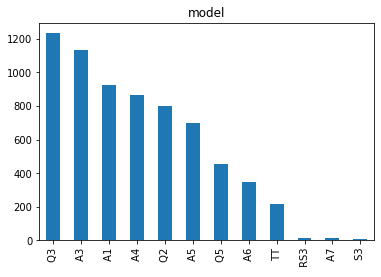

In [ ]:
feature = categorical_features[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
dff = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(dff)
count.plot(kind='bar', title=feature);

Terdapat 12 kategori pada fitur model, secara berurutan dari jumlahnya yang paling banyak yaitu Q3, A3, Q2, A4, A5, A1, Q5, A6, TT, RS3, A7, dan S3.

Selanjutnya menganalisis fitur kategori pada index ke 1 yaitu kolom transmission.

           jumlah sampel  persentase
Manual              2766        41.2
Semi-Auto           2328        34.7
Automatic           1615        24.1


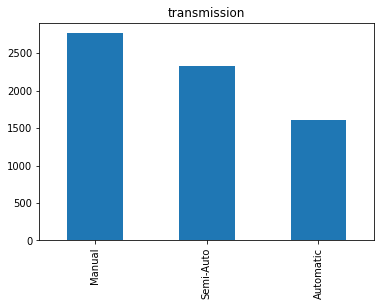

In [ ]:
feature = categorical_features[1]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
dff = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(dff)
count.plot(kind='bar', title=feature);

Berdasarkan deskripsi variabel, urutan kategori transmission dari yang paling banyak ke yang paling sedikit adalah manual, semi-auto, dan automatic. Dari grafik di atas, dapat kita simpulkan bahwa jumlah pengguna dengan transmission manual dan semi-auto sama banyak.

Selanjutnya menganalisis fitur kategori pada index ke 2 yaitu kolom fuelType.

        jumlah sampel  persentase
Petrol           3688        55.0
Diesel           3021        45.0


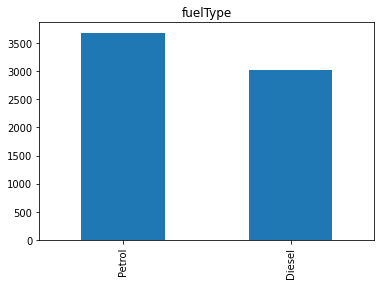

In [ ]:
feature = categorical_features[2]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
dff = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(dff)
count.plot(kind='bar', title=feature);

Berdasarkan deskripsi variabel, fuelType hanya terdiri dari dua kategori yaitu Petrol dan Diesel. Tipe yang paling banyak digunakan adalah petrol.

Selanjutnya, untuk fitur numerik, dianalisis dengan melihat histogram masing-masing fiturnya menggunakan code berikut.

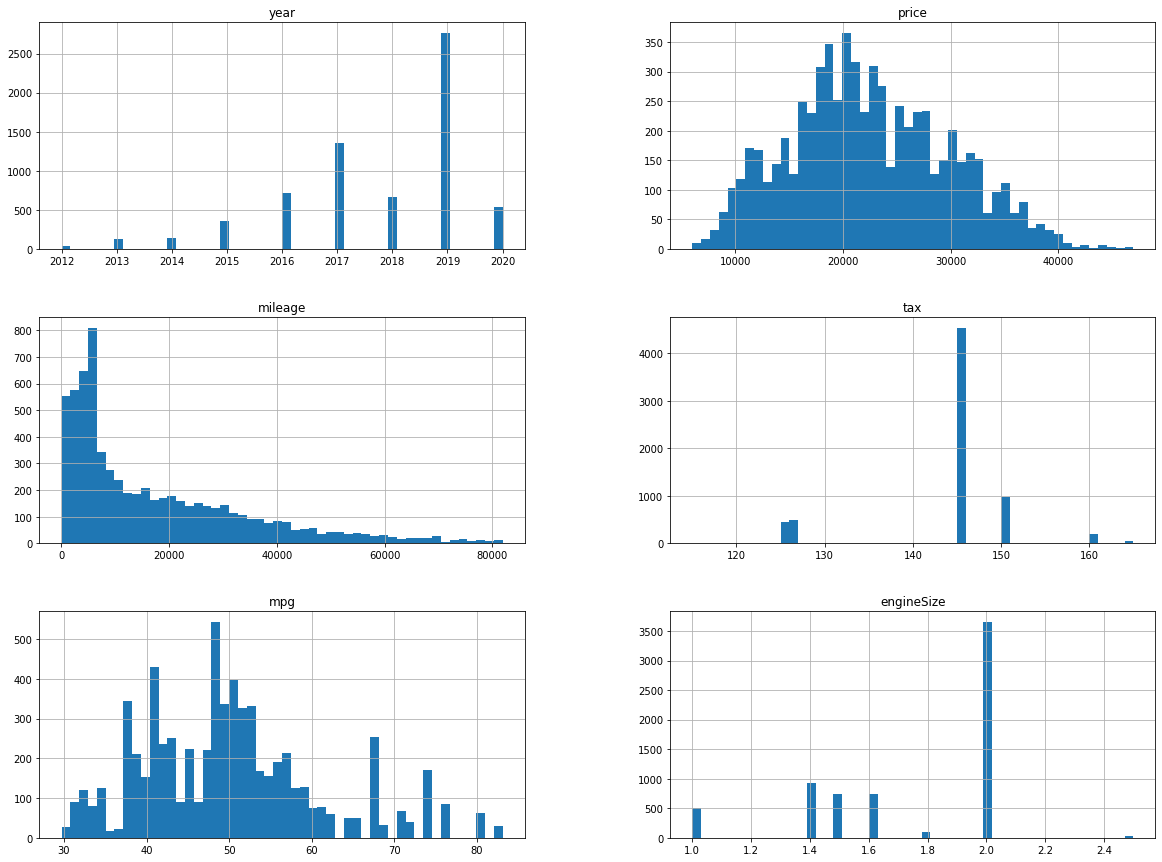

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Pada histogram di atas, khususnya histogram untuk variabel "price" yang merupakan fitur target (label) pada data ini. Dari histogram "price", bisa diperoleh beberapa informasi, antara lain:

* Harga mobil bekas sangat beragam
* Harga terdiri dari skala 5000 hingga 45000 euro
* Rata-rata harga yang paling banyak berada pada skala 15000 hingga 30000 euro, yang mana berada di tengah-tengah rentang harga keseluruhan
* Distribusi harga symmetric.

##Multivariate Analysis

Selanjutnya adalah multivariate analysis untuk menunjukkan hubungan antara dua atau lebih variabel pada data. Pertama, mengecek rata-rata harga terhadap masing-masing fitur untuk mengetahui pengaruh fitur kategori terhadap harga.

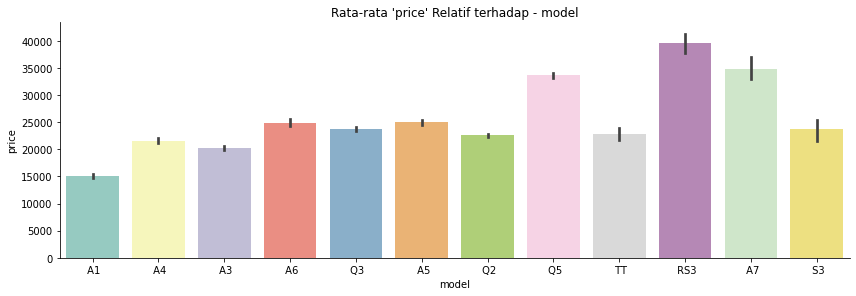

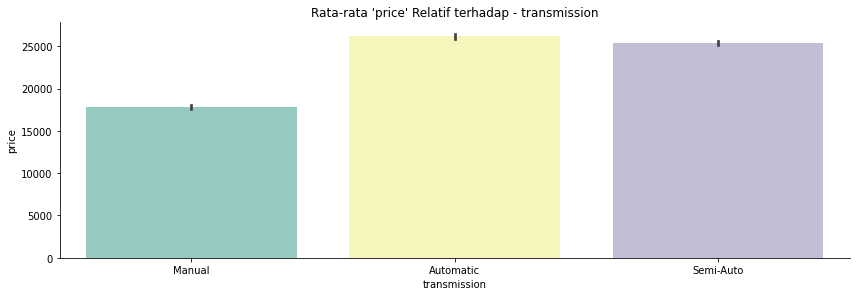

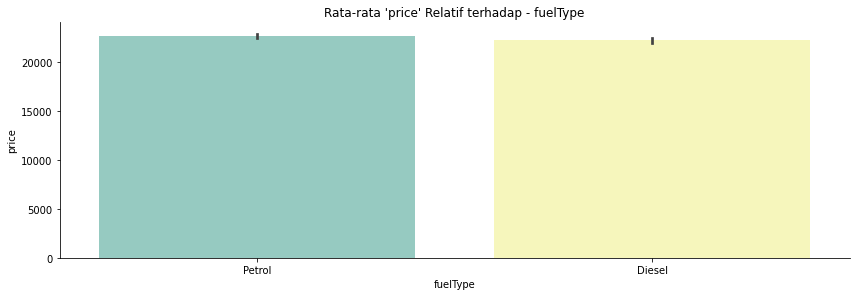

In [ ]:
cat_features = df.select_dtypes(include='object').columns.to_list()
 
for col in cat_features:
  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

Dengan mengamati rata-rata harga relatif terhadap fitur kategori di atas, dapat diperoleh insight sebagai berikut:

* Pada fitur 'model', rata-rata harga sangat bervariasi. Rentangnya berada antara 17500 hingga 40000. Model dengan harga rata-rata paling tinggi yaitu model RS3. Sehingga, fitur model memiliki pengaruh atau dampak yang cukup tinggi terhadap rata-rata harga.
* Pada fitur 'transmission', ketiga tipe transmission memiliki rata-rata harga yang berbeda, pada tipe automatic memiliki rata-rata harga paling tinggi. Tetapi perbedaan rata-rata harga antara tipe automatic dengan semi-auto hanya sedikit saja. Sedangkan pada tipe manual memiliki rata-rata harga paling rendah. Dari sini dapat disimpulkan bahwa transmission memiliki pengaruh yang cukup tinggi terhadap harga.
* Pada fitur 'fuelType', antara tipe petrol dan diesel keduanya memiliki rata-rata harga yang hampir sama. Hal ini berarti bahwa fitur 'fuelType' memiliki pengaruh yang rendah terhadap harga.
Kesimpulan akhir, fitur kategori memiliki pengaruh yang rendah terhadap harga.

Selanjutnya mengamati hubungan antara fitur numerik dengan menggunakan fungsi pairplot().

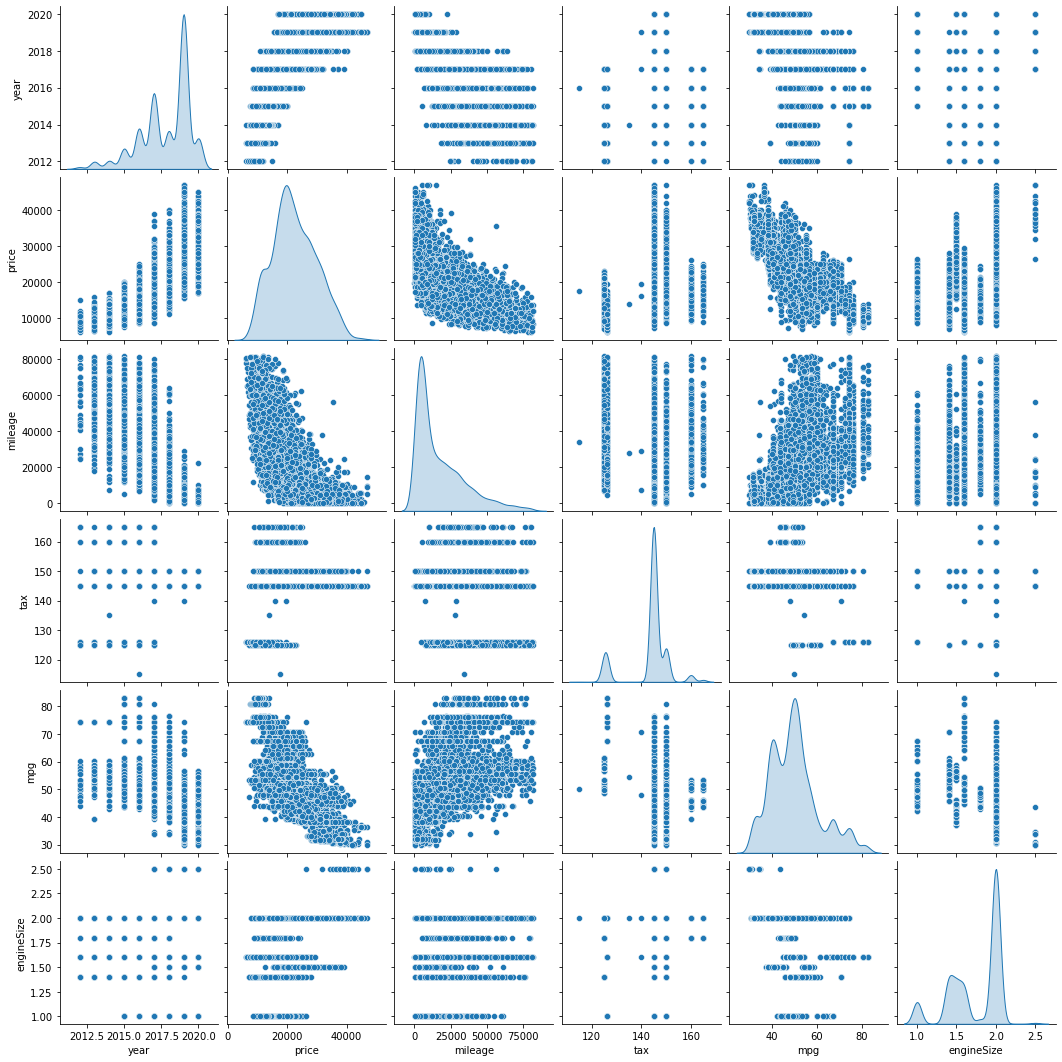

In [ ]:
# mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(df, diag_kind = 'kde')

Fungsi pairplot dari library seaborn menunjukkan relasi pasangan dalam dataset. Pada kasus ini, kita akan melihat relasi antara semua fitur numerik dengan fitur target yaitu 'price'. Untuk membacanya, perhatikan fitur pada sumbu y, temukan fitur target 'price', dan lihatlah grafik relasi antara semua fitur pada sumbu x dengan fitur price pada sumbu y. Dalam hal ini, fitur 'price' berada pada baris kedua (dari atas) sumbu y. Sehingga, kita cukup melihat relasi antar fitur numerik dengan fitur target 'price' pada baris tersebut saja. 

Pada pola sebaran data grafik pairplot di atas, terlihat 'year' memiliki korelasi yang tinggi dengan fitur "price". Lalu fitur 'tax' dan 'engineSize' terlihat memiliki korelasi yang lemah karena sebarannya tidak membentuk pola. Sedangkan untuk fitur mileage dan mpg memiliki korelasi negatif yang berarti menurunnya variabel y saat terjadi kenaikan pada variabel x. Untuk mengevaluasi skor korelasinya, gunakan fungsi corr() seperti kode program di bawah ini.

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

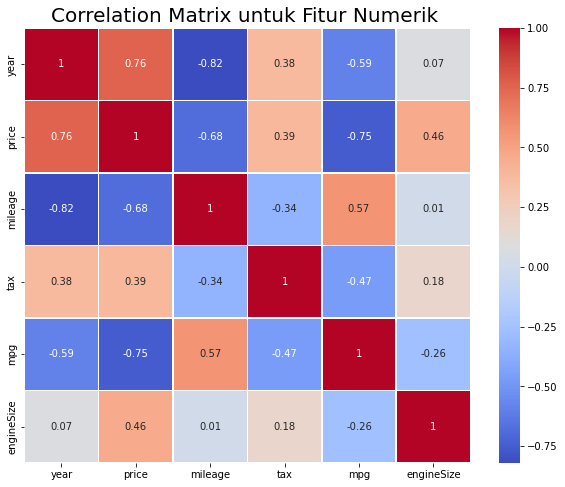

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

##Data Preparation

Salah satu tahapan yang dilakukan pada data preparation adalah encoding fitur kategori. Ada dua teknik yang dilakukan pada program ini yaitu teknik one hot endcoing dan ordinal encoding. Pada fitur transmission dan fuelType menggunakan teknik one hot endcoding, sedangkan pada fitur model menggunakan teknik ordinal encoding.

In [ ]:
df = pd.concat([df, pd.get_dummies(df['transmission'], prefix='transmission')],axis=1)
df = pd.concat([df, pd.get_dummies(df['fuelType'], prefix='fuelType')],axis=1)
df.drop(['transmission', 'fuelType'], axis=1, inplace=True)
df.head()

,model,year,price,mileage,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Petrol
0,A1,2017,12500,15735,150.0,55.4,1.4,0,1,0,0,1
3,A4,2017,16800,25952,145.0,67.3,2.0,1,0,0,1,0
4,A3,2019,17300,1998,145.0,49.6,1.0,0,1,0,0,1
10,A3,2017,16100,28955,145.0,58.9,1.4,0,1,0,0,1
11,A6,2016,16500,52198,125.0,57.6,2.0,1,0,0,1,0


In [ ]:
encoder = OrdinalEncoder()
df['model_code'] = encoder.fit_transform(df[['model']])
df[['model','model_code']].head(10)

,model,model_code
0,A1,0.0
3,A4,2.0
4,A3,1.0
10,A3,1.0
11,A6,4.0
12,Q3,7.0
15,A3,1.0
16,Q3,7.0
19,Q3,7.0
20,A5,3.0


In [ ]:
df.drop(['model'], axis=1, inplace=True)

In [ ]:
X = df.drop(["price"],axis =1)
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 6709
Total # of sample in train dataset: 4696
Total # of sample in test dataset: 2013


In [ ]:
df.columns

Index(['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize',
       'transmission_Automatic', 'transmission_Manual',
       'transmission_Semi-Auto', 'fuelType_Diesel', 'fuelType_Petrol',
       'model_code'],
      dtype='object')

In [ ]:
X.columns

Index(['year', 'mileage', 'tax', 'mpg', 'engineSize', 'transmission_Automatic',
       'transmission_Manual', 'transmission_Semi-Auto', 'fuelType_Diesel',
       'fuelType_Petrol', 'model_code'],
      dtype='object')

Setelah melakukan proses encoding fitur kategori dan train test split, selanjutnya pada tahap data preparation juga melakukan proses standarisasi. Pada program ini proses standarisasi menggunakan teknik standardscaler. StandardScaler melakukan proses standarisasi fitur dengan mengurangkan mean (nilai rata-rata) kemudian membaginya dengan standar deviasi untuk menggeser distribusi.  StandardScaler menghasilkan distribusi dengan standar deviasi sama dengan 1 dan mean sama dengan 0. Sekitar 68% dari nilai akan berada di antara -1 dan 1.

In [ ]:
num_features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
scaler = StandardScaler()
scaler.fit(X_train[num_features])
X_train[num_features] = scaler.transform(X_train[num_features])
X_train[num_features].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,year,mileage,tax,mpg,engineSize
9439,0.732819,-1.020285,0.165034,-0.195353,0.804790
5899,0.732819,-0.730111,0.165034,-0.482269,-0.429668
3321,0.732819,-1.017354,0.165034,-1.000568,0.804790
8666,-0.480836,0.115323,0.789811,0.711670,0.804790
5944,0.732819,-0.791487,0.165034,-0.343439,-0.429668


In [ ]:
X_train[num_features].describe().round(4)

,year,mileage,tax,mpg,engineSize
count,4696.0000,4696.0000,4696.0000,4696.0000,4696.0000
mean,0.0000,0.0000,0.0000,0.0000,-0.0000
std,1.0001,1.0001,1.0001,1.0001,1.0001
min,-3.5150,-1.0229,-3.5836,-1.8798,-2.2814
25%,-0.4808,-0.7454,0.1650,-0.7877,-0.7383
50%,0.1260,-0.3840,0.1650,-0.0380,0.8048
75%,0.7328,0.5205,0.1650,0.4988,0.8048
max,1.3396,3.7765,2.6641,3.0625,2.3479


##Model Development

Model development adalah tahapan di mana kita menggunakan algoritma machine learning untuk menjawab problem statement dari tahap business understanding.

Pada tahap ini, kita akan mengembangkan model machine learning dengan tiga algoritma. Kemudian, kita akan mengevaluasi performa masing-masing algoritma dan menentukan algoritma mana yang memberikan hasil prediksi terbaik. Ketiga algoritma yang akan kita kembangkan, antara lain:

1. K-Nearest Neighbor
2. Random Forest
3. Boosting Algorithm
4. Decision Tree Algorithm
5. Linear Regression Algorithm
6. SVM Algorithm

In [ ]:
# Siapkan daraframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting', 'DecisionTree', 'LinearRegression', 'SVM', 
                               'KNN_Tuning', 'RandomForest_Tuning', 'Boosting_Tuning', 'DecisionTree_Tuning','SVM_Tuning'])

###Base Model

**KNN Algorithm**

In [ ]:
# buat model prediksi
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
models.loc['train_mse','KNN'] = mean_squared_error(y_pred=knn.predict(X_train), y_true=y_train) 

**Random Forest Algorithm**

In [ ]:
# buat model prediksi
rf = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
rf.fit(X_train, y_train)
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=rf.predict(X_train), y_true=y_train)          

**Boosting Algorithm**

In [ ]:
# buat model prediksi
boosting = AdaBoostRegressor(n_estimators=50, learning_rate=0.05, random_state=55)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

**Decision Tree Algorithm**

In [ ]:
# buat model prediksi
DT = DecisionTreeRegressor(random_state = 0)
DT.fit(X_train, y_train)
models.loc['train_mse','DecisionTree'] = mean_squared_error(y_pred=DT.predict(X_train), y_true=y_train)

**Linear Regression Algorithm**

In [ ]:
# buat model prediksi
LR = LinearRegression()
LR.fit(X_train, y_train)
models.loc['train_mse','LinearRegression'] = mean_squared_error(y_pred=LR.predict(X_train), y_true=y_train)

**Support Vector Regression Algorithm**

In [ ]:
# buat model prediksi
svr = SVR(C=1.0, epsilon=0.2)
svr.fit(X_train, y_train)
models.loc['train_mse','SVM'] = mean_squared_error(y_pred=svr.predict(X_train), y_true=y_train)

###Hyperparameter Tuning

Setelah membangun model menggunakan model biasa dengan menentukan sendiri parameternya, maka dilakukanlah hyperparameter tuning untuk mendapatkan parameter terbaik serta membandingkan dengan model yang sudah dibuat sebelumnya.
Hyperparameter tuning dilakukan pada 5 algoritma yaitu :

1. K-Nearest Neighbor
2. Random Forest
3. Boosting Algorithm
4. Decision Tree Algorithm
5. SVM Algorithm

Sedangkan pada linear regression tidak dilakukan hyperparameter tuning, karena pada algoritma tersebut tidak terdapat parameter yang dapat dilakukan proses hyperparameter tuning.

**KNN Hyperparameter Tuning**

In [ ]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
param_grid_knn = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_model = KNeighborsRegressor()
#Use GridSearch
knn_tuning = GridSearchCV(knn_model, param_grid_knn, cv=10)
#Fit the model
knn_tuning.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,

In [ ]:
print(knn_tuning.best_estimator_)

KNeighborsRegressor(algorithm='auto', leaf_size=2, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=1,
                    weights='uniform')


In [ ]:
models.loc['train_mse','KNN_Tuning'] = mean_squared_error(y_pred=knn_tuning.predict(X_train), y_true=y_train)

**Random Forest Hyperparameter Tuning**

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid_rf = {
    'bootstrap': [True],
    'max_depth': [16, 32, 80, 90, 100, 110],
    'max_features': [2, 3],
    'random_state': [55,100],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [50, 100, 200, 300, 1000]
}

# Create a based model
rf_model = RandomForestRegressor()
# Instantiate the grid search model
rf_tuning = GridSearchCV(estimator = rf_model, param_grid = param_grid_rf, cv = 3, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
rf_tuning.fit(X_train,y_train)

Fitting 3 folds for each of 1080 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 18.0min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 24.8min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed: 32.4min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed: 40.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, rand...e=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-

In [ ]:
print(rf_tuning.best_estimator_)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=32, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=55, verbose=0, warm_start=False)


In [ ]:
models.loc['train_mse','RandomForest_Tuning'] = mean_squared_error(y_pred=rf_tuning.predict(X_train), y_true=y_train)

**Boosting Hyperparameter Tuning**

In [ ]:
param_grid_boosting = {
    'n_estimators': [50, 100],
    'learning_rate' : [0.01, 0.05, 0.1, 0.5],
    'loss' : ['linear', 'square', 'exponential']
}

boosting_model = AdaBoostRegressor(random_state=55) 
boosting_tuning =GridSearchCV(boosting_model, param_grid_boosting, cv=5, return_train_score=True)
boosting_tuning.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=55),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.5],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [ ]:
print(boosting_tuning.best_estimator_)

AdaBoostRegressor(base_estimator=None, learning_rate=0.5, loss='linear',
                  n_estimators=100, random_state=55)


In [ ]:
models.loc['train_mse','Boosting_Tuning'] = mean_squared_error(y_pred=boosting_tuning.predict(X_train), y_true=y_train)

**Decision Tree Hyperparameter Tuning**

In [ ]:
# Hyper parameters range intialization for tuning 
param_grid_dt ={"splitter":["best","random"],
                "min_samples_split": [10, 20, 40],
                "max_depth" : [1,3,5,7,9,11,12],
                "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
                #"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
                #"max_features":["auto","log2","sqrt",None],
                "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }
#Create new KNN object
dt_model = DecisionTreeRegressor()
#Use GridSearch
dt_tuning = GridSearchCV(dt_model, param_grid_dt, cv=3, verbose=3)
#Fit the model
dt_tuning.fit(X_train,y_train)

Fitting 3 folds for each of 4200 candidates, totalling 12600 fits
[CV] max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10, splitter=best 
[CV]  max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10, splitter=best, score=0.539, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10, splitter=best 
[CV]  max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10, splitter=best, score=0.480, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10, splitter=best 
[CV]  max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10, splitter=best, score=0.495, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10, splitter=random 
[CV]  max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10, splitter=random, score=0.410, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=None, min_samples

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Streaming output truncated to the last 5000 lines.
[CV] max_depth=11, max_leaf_nodes=60, min_samples_leaf=2, min_samples_split=10, splitter=best 
[CV]  max_depth=11, max_leaf_nodes=60, min_samples_leaf=2, min_samples_split=10, splitter=best, score=0.887, total=   0.0s
[CV] max_depth=11, max_leaf_nodes=60, min_samples_leaf=2, min_samples_split=10, splitter=random 
[CV]  max_depth=11, max_leaf_nodes=60, min_samples_leaf=2, min_samples_split=10, splitter=random, score=0.881, total=   0.0s
[CV] max_depth=11, max_leaf_nodes=60, min_samples_leaf=2, min_samples_split=10, splitter=random 
[CV]  max_depth=11, max_leaf_nodes=60, min_samples_leaf=2, min_samples_split=10, splitter=random, score=0.877, total=   0.0s
[CV] max_depth=11, max_leaf_nodes=60, min_samples_leaf=2, min_samples_split=10, splitter=random 
[CV]  max_depth=11, max_leaf_nodes=60, min_samples_leaf=2, min_samples_split=10, splitter=random, score=0.853, total=   0.0s
[CV] max_depth=11, max_leaf_nodes=60, min_samples_leaf=2, min_sam

[Parallel(n_jobs=1)]: Done 12600 out of 12600 | elapsed:  1.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
              

In [ ]:
print(dt_tuning.best_estimator_)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=12,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=20,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')


In [ ]:
models.loc['train_mse','DecisionTree_Tuning'] = mean_squared_error(y_pred=dt_tuning.predict(X_train), y_true=y_train)

**Support Vector Regression Hyperparameter Tuning**

In [ ]:
K = 5
param_grid_svm = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf', 'poly', 'sigmoid']}
svm_tuning = GridSearchCV(SVR(epsilon = 0.01), param_grid_svm, refit=True, verbose=2, cv = K)
svm_tuning.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   1.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   1.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   1.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   1.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   1.3s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   1.3s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   1.2s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   1.4s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] .

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 83.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.01, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [ ]:
print(svm_tuning.best_estimator_)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=1,
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [ ]:
models.loc['train_mse','SVM_Tuning'] = mean_squared_error(y_pred=svm_tuning.predict(X_train), y_true=y_train)

##Evaluasi Model

Tahapan selanjutnya yaitu mengevaluasi model untuk mengetahui apakah model yang sudah dibuat bagus atau tidak. Metrik yang digunakan pada prediksi ini adalah MSE atau Mean Squared Error yang menghitung selisih rata-rata nilai sebenarnya dengan nilai prediksi.

Namun, sebelum menghitung nilai MSE dalam model, perlu dilakukan proses scaling fitur numerik pada data uji. Hal ini dilakukan agar skala antara data latih dan data uji sama serta bisa melakukan evaluasi.

In [ ]:
# Scale our numerical features so they have zero mean and a variance of one
scaler.fit(X_test[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])
#X_test.loc[:, num_features] = scaler.transform(X_test[num_features])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [ ]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RandomForest','Boosting','DecisionTree','LinearRegression','SVM', 'KNN_Tuning', 'RandomForest_Tuning', 'Boosting_Tuning', 'DecisionTree_Tuning', 'SVM_Tuning'])
model_dict = {'KNN': knn, 'RandomForest': rf, 'Boosting': boosting, 'DecisionTree': DT, 'LinearRegression': LR, 'SVM': svr, 
              'KNN_Tuning': knn_tuning, 'RandomForest_Tuning': rf_tuning, 'Boosting_Tuning': boosting_tuning, 'DecisionTree_Tuning': dt_tuning, 
              'SVM_Tuning': svm_tuning}
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
mse

,train,test
KNN,3915.44,4234.56
RandomForest,764.382,3580.44
Boosting,9499.99,9612.96
DecisionTree,94.8128,6350.96
LinearRegression,8083.89,7604.88
SVM,51490.6,50409.2
KNN_Tuning,2934.81,4049.85
RandomForest_Tuning,2513.12,3494.36
Boosting_Tuning,8054.92,8201.74
DecisionTree_Tuning,2950.2,4374.3


Hasil program di atas adalah hasil evaluasi pada data latih dan data test. Agar memudahkan pengamatan, maka dibuat plot metrik tersebut dengan bar chart. Plot disusun berdasarkan nilai pada data test.

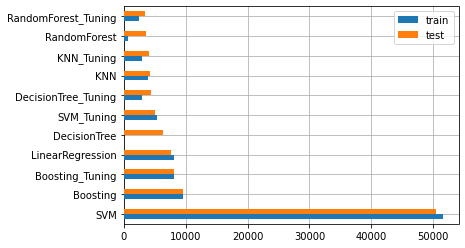

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Dari gambar di atas, terlihat bahwa, model Random Forest memberikan nilai eror yang paling kecil. Model inilah yang akan dipilih sebagai model terbaik untuk melakukan prediksi harga diamonds.

Untuk mengujinya, buatlah prediksi menggunakan data dari data test.

In [ ]:
prediksi = X_test.iloc[1:2].copy()
pred_dict = {'y_true':y_test[1:2]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RandomForest,prediksi_Boosting,prediksi_DecisionTree,prediksi_LinearRegression,prediksi_SVM,prediksi_KNN_Tuning,prediksi_RandomForest_Tuning,prediksi_Boosting_Tuning,prediksi_DecisionTree_Tuning,prediksi_SVM_Tuning
3587,10291,9949.2,10072.6,11462.3,9600.0,10730.5,21129.2,9956.0,10201.7,12330.9,9935.1,10664.3
